In [2]:
# Configure Autoreload
%load_ext autoreload
%autoreload 2

In [3]:
# Add parent directory to system path
import os, sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

In [4]:
import graph.graph_db as graph_db
import seaborn as sns
import os
import sys

# Add parent directory to system path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from itertools import count, islice

import graphblas_algorithms as blas
import networkx as nx
import numpy as np

from algorithms import *

import graph.graph_db as graph_db
import synthesis.edge_addition_generator as eag
import synthesis.graph_generator as graph_generator
import synthesis.weight_generator as weight_generator
from algorithms.ga import GeneticSolver
from algorithms.greedy import GreedySolver
from algorithms.sa import SimulatedAnnealingSolver
from algorithms.montecarlo import MonteCarloSolver
from algorithms.solver import ProblemTooBigException
from graph import EdgeSet, dynamic_aspl, model
from synthesis.problem_generator import generate_problem
from graph import dynamic_aspl
from synthesis.weight_generator import MetaWeighter, UniformWeighter, Uniform 
from itertools import islice, count
from synthesis.combinations import find_closest_nCr, find_nCr_from_complexity
import matplotlib.pyplot as plt
import pandas as pd
from synthesis.randomisation import TruncatedNormal, RandomChoice
from analysis import visualisations

In [10]:
data = []
with graph_db.open('../data/graph.db') as db:
    data = db.as_dataframe()

In [19]:
data['density'] = data['m'] / (data['n'] * (data['n'] - 1))

In [25]:
df = data[data.experiment_name == 'small_solveable']

[Text(0.5, 1.0, 'Exhaustively Solved Problems - \nHistogram of Number of Graph Nodes')]

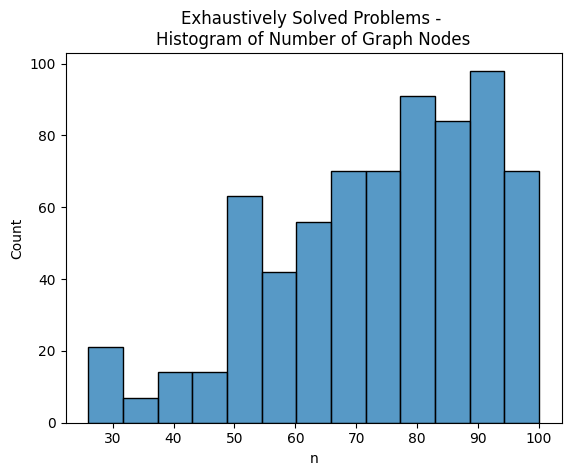

In [36]:
# Plot with title
sns.histplot(df['n']).set(title='Exhaustively Solved Problems - \nHistogram of Number of Graph Nodes')


<Axes: >

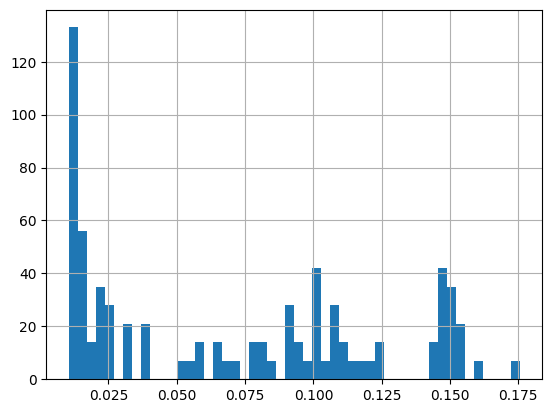

In [27]:
df['density'].hist(bins=50)

<Axes: xlabel='solution_method', ylabel='solution_aspl'>

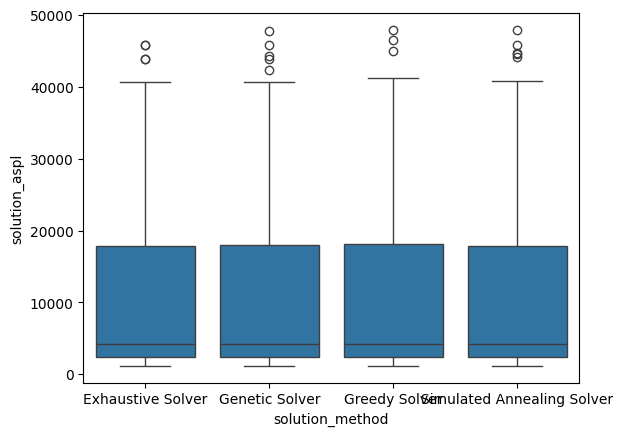

In [38]:
sns.boxplot(data=df, y='solution_aspl', x='solution_method')

In [18]:
.set(title='Title of Plot')

Index(['graph_id', 'experiment_name', 'description', 'graph_aspl', 'n', 'm',
       'name', 'graph_class', 'generation_method', 'generation_parameters',
       'problem_id', 'k', 'degree_s', 'generation_method', 'solution_aspl',
       'run_time', 'is_optimal', 'solution_method', 'solver_parameters',
       'iterations', 'is_optimal', 'termination_reason',
       'generation_parameters_n', 'generation_parameters_k',
       'generation_parameters_p', 'generation_parameters_m',
       'generation_parameters_d', 'solver_parameters_verbose',
       'solver_parameters_maximum_iterations',
       'solver_parameters_maximum_time', 'solver_parameters_patience',
       'solver_parameters_min_delta', 'solver_parameters_repititions',
       'solver_parameters_aspl_lower_bound', 'solver_parameters_method_name',
       'solver_parameters_early_stopping', 'solver_parameters_population_size',
       'solver_parameters_gene_mutation_rate',
       'solver_parameters_creature_mutation_rate',
       'sol

In [43]:
df[['solution_method','iterations']].head(50)

,solution_method,iterations
2,Exhaustive Solver,1313399
3,Exhaustive Solver,1313399
4,Genetic Solver,29
5,Genetic Solver,99
6,Greedy Solver,2
7,Simulated Annealing Solver,1255
8,Simulated Annealing Solver,4001
9,Exhaustive Solver,1055239
10,Exhaustive Solver,1055239
11,Genetic Solver,28
